# Simple Linear regression (Least-Square)

In this notebook, I will do an exercise to practice my understanding of the Least-square linear regression.


In [9]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=1, noise=0.5, bias=4) # type: ignore

# The beta1 = SXY / SXX

# The beta0 = mean(Y) - beta1 * mean(X)


$
S_{xx} = \sum{(x_i - \bar{x})^2}
$
$
S_{xy} = \sum{(x_i - \bar{x}) * y_i}
$

$
\beta_{1} = \frac{S_{xy}}{S_{xx}}
$



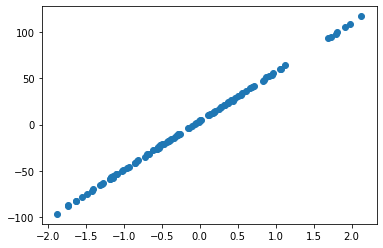

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.scatter(X, y)


In [3]:
# Calculate the Corrected sum of product of Xi

# Sxx = Sum(Xi - mean(X))
# Calculate the Corrected sum of cross product of Xi and Yi
# SXy = Sum((Xi - mean(X)) * Yi)

# The beta1 = SXY / SXX

# The beta0 = mean(Y) - beta1 * mean(X)

In [4]:
import numpy as np

def simple_linear_regression(X, y):
    Sxx = np.sum((X - np.mean(X)) ** 2)
    Sxy = np.sum((X - np.mean(X)).ravel() * y)

    beta1 = Sxy / Sxx

    beta0 = np.mean(y) - beta1 * np.mean(X)

    return (beta0, beta1, Sxx, Sxy)

beta0, beta1, _, _ = simple_linear_regression(X, y)

In [5]:
def plot_range(minx, maxx, beta0, beta1):
    x = [minx, maxx]
    y = [beta0 + minx * beta1, beta0 + maxx * beta1]
    plt.plot(x, y, c='red')

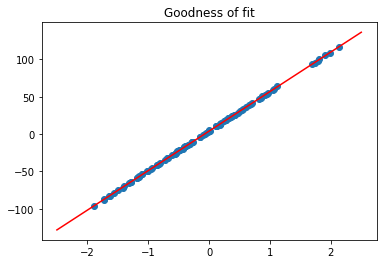

In [6]:
plt.title("Goodness of fit")
plt.scatter(X, y)
plot_range(-2.5, 2.5, beta0, beta1)

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

## The standard error of regression

First, the residual sum of sqaure consists of the sum of errors
$
    SS_{res} = \sum{(y_i - \hat{y_i}) ^ 2}
$

$
SS_{res} = \sum{(y_i - \hat{y_i}) ^ 2} \\
        = \sum{(y_i - x_i\beta_1 - \beta_0) ^ 2} \\
        = \sum{(y_i - x_i\beta_1 - \bar{y} + \bar{x}\beta_1) ^ 2} \\
        = \sum{((y_i - \bar{y}) - \beta_1(x_i - \bar{x})) ^ 2} \\
        = \sum{(y_i - \bar{y}) ^ 2} - 2\beta_1\sum{(x_i - \bar{x})(y_i - \bar{y})} + \beta_1^2\sum{(x_i - \bar{x})^2} \\
        = S_{yy} - 2\beta_1S_{xy} + \beta_1^2S_{xx} \\
        = S_{yy} - \beta_1S_{xy}
        = SS_t - \beta_1S_{xy}
$

Inside this formula:
$
    -2\beta_1\sum{(x_i-\bar{x})(y_i - \bar{y})} \\
    = -2\beta_1(\sum{(x_i - \bar{x})y_i} - \sum{(x_i - \bar{x})\bar{y}}) \\
    = -2\beta_1S_{xy}
$

and 

$
\beta_1^2S_{xx} = \beta_1\sum{\beta_1(x_i - \bar{x})(x_i - \bar{x})} \\
                = \beta_1\sum{(\beta_1x_i - \beta_1\bar{x})(x_i - \bar{x})}\\
                = \beta_1\sum{(y_i - \bar{y})(x_i - \bar{x})} \\
                = \beta_1S_{xy}
$

In [23]:
def calculate_se_regression(y_true, y_pred):
    
    # root residual sum of square

    return np.sum((y - lr.predict(X)) ** 2) / (len(y) - 2) ** 1/2

In [35]:
calculate_se_regression(y, lr.predict(X))

# (y - lr.predict(X)).sum()


0.1313636390095976